# Superstore Sales Dataset Analysis Project

## Project Overview
This project involves analyzing sales data from a commercial store (Superstore Sales Dataset). The goal is to gain insights into sales trends, distribution of products, performance by category, and customer segments. The analysis also explores relationships between various factors influencing sales.

### Objectives:
- Perform exploratory data analysis (EDA) on the sales dataset.
- Visualize sales trends over time, by category, and customer segment.
- Clean and preprocess data, handle missing values, and ensure correct data types.


# Step 1: Importing Libraries

For this project, we are using the following Python libraries:

- **Pandas**: To handle and manipulate data.
- **Matplotlib**: For basic plotting of visualizations.
- **Seaborn**: For creating enhanced and aesthetically pleasing visualizations like bar plots, box plots, and line plots.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Step 2: Loading the Dataset

The dataset used in this project is a CSV file containing sales transactions. The dataset was loaded using `pandas.read_csv()` function, which is used to read CSV files into a pandas DataFrame.

Here's an initial view of the data:

```python
df.head()  # Displays the first few rows of the dataset


In [10]:
df = pd.read_csv("C:/Users/Aditya Verma/Downloads/train.csv/Superstore Sales Dataset.csv")

In [11]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Regi

In [37]:
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Year-Month            period[M]
dtype: object


In [12]:
# Check for missing (null) values in each column
print("\nChecking for missing (null) values in the dataset:")
missing_data = df.isnull().sum()  # Count of missing values for each column
print(missing_data)


Checking for missing (null) values in the dataset:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


# Step 3: Data Cleaning

After loading the data, the next task was to clean it:

- **Handling Missing Values**: The dataset had missing values in certain columns, which were handled by either dropping rows or filling them with the mean or median of the column.
- **Converting Data Types**: We ensured the 'Order Date' column was converted to `datetime` format for easy manipulation of dates.
- **Checking for Duplicates**: Duplicate rows were identified and removed.

In [13]:
# Calculate percentage of missing values for each column
missing_percentage = (missing_data / len(df)) * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)


Percentage of missing values in each column:
Row ID           0.000000
Order ID         0.000000
Order Date       0.000000
Ship Date        0.000000
Ship Mode        0.000000
Customer ID      0.000000
Customer Name    0.000000
Segment          0.000000
Country          0.000000
City             0.000000
State            0.000000
Postal Code      0.112245
Region           0.000000
Product ID       0.000000
Category         0.000000
Sub-Category     0.000000
Product Name     0.000000
Sales            0.000000
dtype: float64


In [15]:
# Basic statistics summary (only numerical columns by default)
print("\nSummary statistics for numerical columns:")
print(df.describe())


Summary statistics for numerical columns:
            Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000


In [16]:
# Check for any duplicates in the dataset (rows with identical values)
print("\nChecking for duplicate rows:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Checking for duplicate rows:
Number of duplicate rows: 0


In [17]:
# Count unique values in each column (useful for categorical variables)
print("\nCount of unique values in each column:")
print(df.nunique())


Count of unique values in each column:
Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64


In [38]:
#Handle missing values
df = df.dropna(subset=['Sales', 'Order Date'])

# Step 4: Exploratory Data Analysis (EDA)

In this step, we performed an in-depth analysis of the sales data. We explored various features, including the distribution of sales, sales by category, customer segments, and time-based trends.

### Sales Distribution
The distribution of sales across all transactions was plotted using a histogram. This gives us an idea of how sales are spread out across the dataset.

### Sales by Category
A bar chart was created to visualize sales distribution across different product categories.

### Sales by Customer Segment
We also explored sales across different customer segments to understand how different customer groups contribute to the overall sales.

### Boxplot for Sales Distribution
A boxplot was used to visualize the spread of sales and detect any outliers.

### Sales Trend Over Time
We created a time-based analysis by plotting total sales over time using a line plot.


In [39]:
#Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

In [40]:
# Create a new column for "Year-Month"
df['Year-Month'] = df['Order Date'].dt.to_period('M')

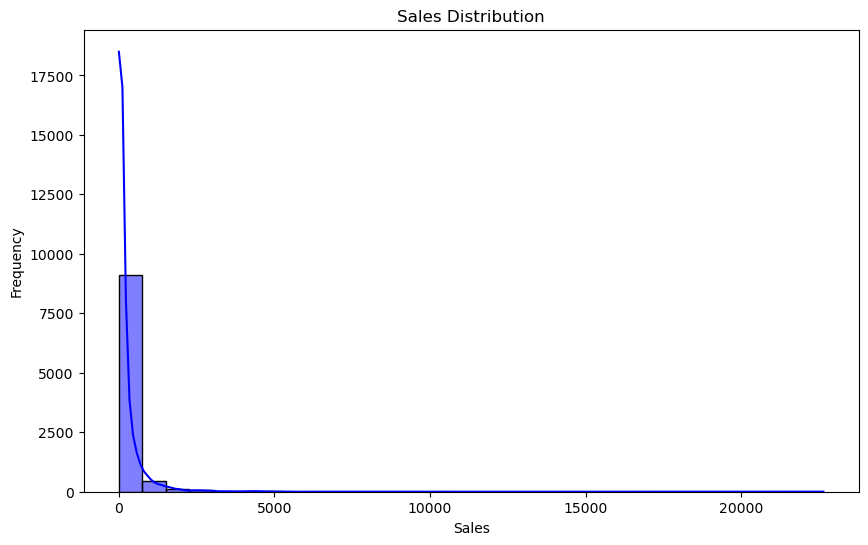

In [41]:
#Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

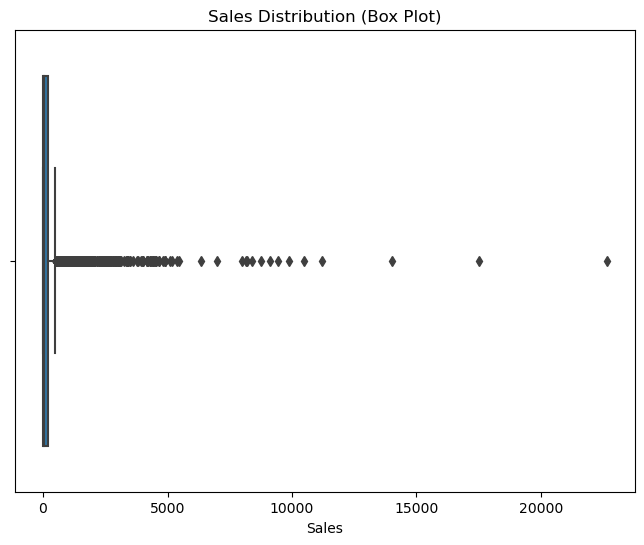

In [55]:
#Using Boxplot for Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Sales')
plt.title('Sales Distribution (Box Plot)')
plt.show()

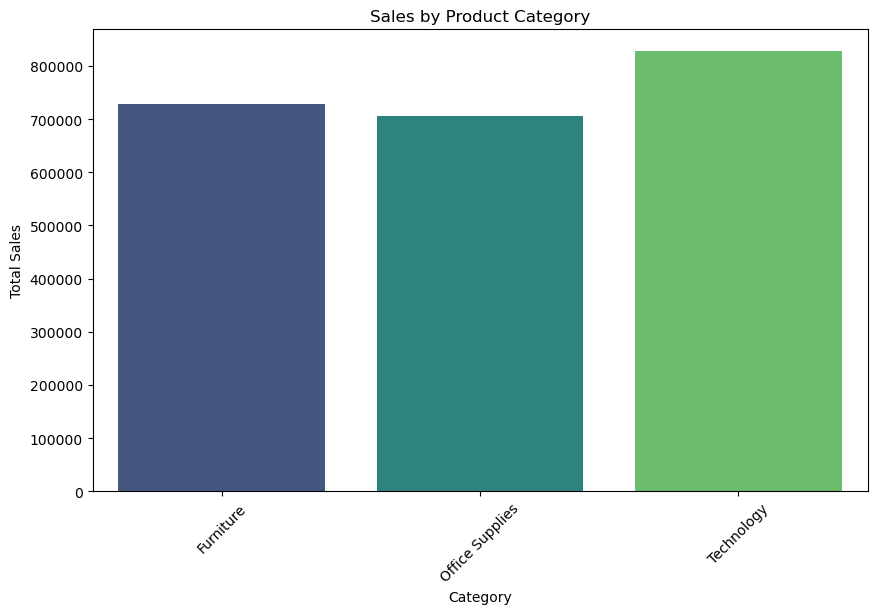

In [43]:
#Sales by Category (Bar Plot)
plt.figure(figsize=(10, 6))
category_sales = df.groupby('Category')['Sales'].sum().reset_index()
sns.barplot(data=category_sales, x='Category', y='Sales', palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

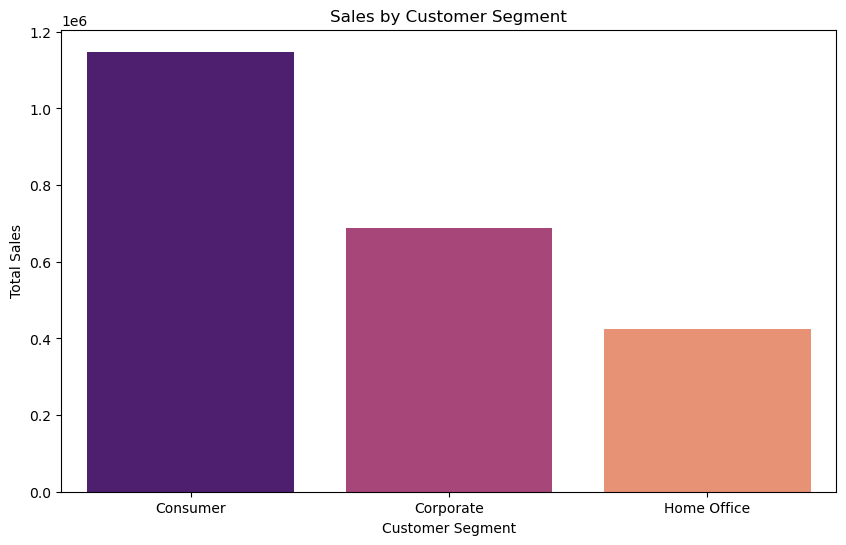

In [44]:
#Sales by Customer Segment
plt.figure(figsize=(10, 6))
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
sns.barplot(data=segment_sales, x='Segment', y='Sales', palette='magma')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()

  Year-Month      Sales
0    2015-01  14205.707
1    2015-02   4519.892
2    2015-03  55205.797
3    2015-04  27906.855
4    2015-05  23644.303
Index(['Year-Month', 'Sales'], dtype='object')
Year-Month    period[M]
Sales           float64
dtype: object
0


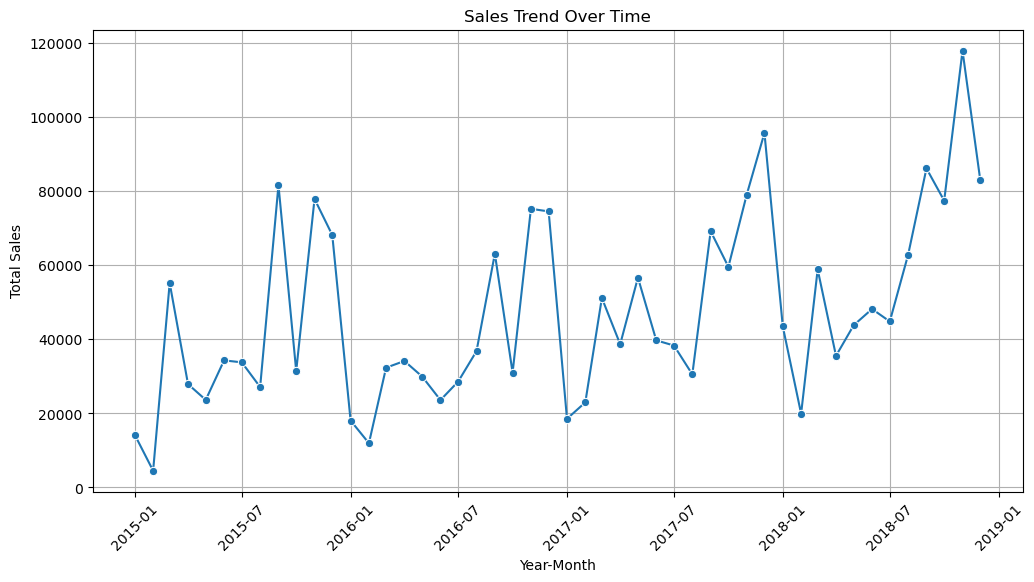

In [49]:
# Group by 'Year-Month' and sum 'Sales'
sales_trends = df.groupby('Year-Month')['Sales'].sum().reset_index()

# Check the structure of the sales_trends DataFrame
print(sales_trends.head())  # Print first few rows
print(sales_trends.columns)  # Print column names
print(sales_trends.dtypes)   # Check data types

# Strip whitespace from column names if necessary
sales_trends.columns = sales_trends.columns.str.strip()

# Check if 'Year-Month' is PeriodDtype or datetime
if sales_trends['Year-Month'].dtype == 'period[M]':
    # Convert 'Year-Month' from PeriodDtype to datetime
    sales_trends['Year-Month'] = sales_trends['Year-Month'].dt.to_timestamp()
elif sales_trends['Year-Month'].dtype == 'object':
    # If it's an object (string), convert to datetime
    sales_trends['Year-Month'] = pd.to_datetime(sales_trends['Year-Month'], errors='coerce')

# Convert 'Sales' to numeric
sales_trends['Sales'] = pd.to_numeric(sales_trends['Sales'], errors='coerce')

# Check for missing values in 'Sales'
print(sales_trends['Sales'].isnull().sum())

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Year-Month', y='Sales', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Correlation Heatmap

We also explored correlations between numerical variables to identify any significant relationships. A heatmap was generated to visualize these correlations.


In [53]:
# Display unique values from non-numeric columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print()

Unique values in 'Order ID':
['CA-2017-152156' 'CA-2017-138688' 'US-2016-108966' ... 'CA-2015-127166'
 'CA-2017-125920' 'CA-2016-128608']

Unique values in 'Ship Date':
['11/11/2017' '16/06/2017' '18/10/2016' ... '12/03/2015' '06/04/2018'
 '13/05/2016']

Unique values in 'Ship Mode':
['Second Class' 'Standard Class' 'First Class' 'Same Day']

Unique values in 'Customer ID':
['CG-12520' 'DV-13045' 'SO-20335' 'BH-11710' 'AA-10480' 'IM-15070'
 'HP-14815' 'PK-19075' 'AG-10270' 'ZD-21925' 'KB-16585' 'SF-20065'
 'EB-13870' 'EH-13945' 'TB-21520' 'MA-17560' 'GH-14485' 'SN-20710'
 'LC-16930' 'RA-19885' 'ES-14080' 'ON-18715' 'PO-18865' 'LH-16900'
 'DP-13000' 'JM-15265' 'TB-21055' 'KM-16720' 'PS-18970' 'BS-11590'
 'KD-16270' 'HM-14980' 'JE-15745' 'KB-16600' 'SC-20770' 'DN-13690'
 'JC-16105' 'CS-12400' 'PG-18895' 'GM-14455' 'JS-15685' 'KB-16315'
 'RB-19705' 'PN-18775' 'KD-16345' 'ER-13855' 'RB-19465' 'GZ-14470'
 'LC-16870' 'JM-15250' 'PA-19060' 'CV-12805' 'CL-12565' 'RC-19960'
 'DK-13090' 'GG-1465

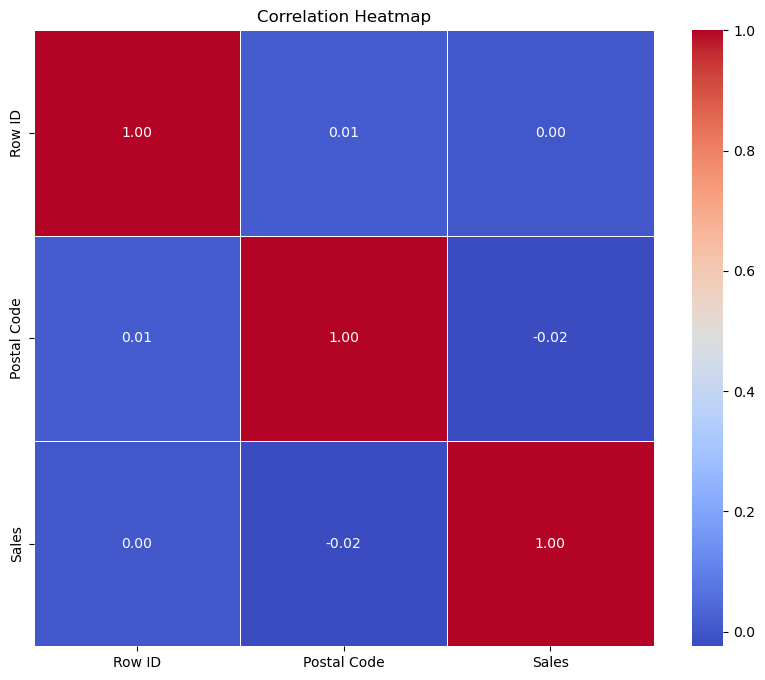

In [54]:
# Select only numeric columns for correlation analysis

df_numeric = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Conclusion

In this project, we analyzed the sales data of a commercial store and uncovered several key insights:
  
- **Sales Distribution**: The majority of the sales were concentrated in a few high-value transactions, while the rest had lower values, as revealed by the histogram and box plot.
- **Performance by Category**: The 'Furniture' category generated the highest sales, followed by 'Technology' and 'Office Supplies'.
- **Sales Trend Over Time**: We observed steady sales growth during the last few months, which might indicate a seasonal or promotional effect.
- **Customer Segment Analysis**: The 'Consumer' segment generated the most sales, with the 'Corporate' segment showing a steady increase.

The findings suggest that focusing marketing efforts on the 'Furniture' category and 'Consumer' segment could yield better returns. Additionally, the analysis of the sales trend reveals opportunities for targeted promotions during peak sales months.

### Future Steps:
- Further analysis could be performed on sales by geographical location (e.g., region or city).
- Implement predictive modeling to forecast future sales based on historical data.
